# Analytic Solution

# Numerical Analysis

## FTCS Scheme

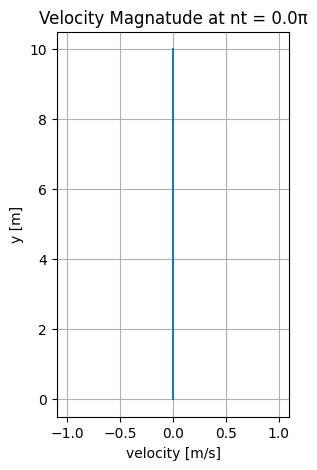

NameError: name 'u' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt

''' Parameters '''
nu = 1            # Dynamic Viscosity
n = 2             # Constant
U0 = 1            # Initial Velocity
L = 10            # Height
T = 10*np.pi      # Transient Period (Quasi-Steady State)
dy = 0.5          # Grid Size
dt = np.pi/40     # Time Step
time = 0          # Initial Time

''' Set Grid & Initial Condition '''
y = np.arange(0, L+dy, dy)
u_F = np.zeros(np.size(y))

''' Stability Check '''
def checkCFL(dt,dy,u_F):
    umax = np.max(u)
    CFL = umax*dt/dy

    return CFL

''' 2nd-order Central at Space '''
def RHS(u):
    rhs = np.zeros_like(u)

    for i in range(1, len(y)-1):
        rhs[i] = nu * (u[i+1] - 2*u[i] + u[i-1]) / dy**2

    return rhs

''' Set Boundary Condition '''
def setBc(u, time):  # Non-Slip
    u[0] = U0*np.cos(n*time)
    u[-1] = 0.0

    return

''' Plot '''
def plot():
    plt.figure(figsize=(3,5))
    plt.title(f'Velocity Magnatude at nt = {n*time/np.pi:.1f}π')
    plt.plot(u_F, y)
    plt.xlim([-1.1, 1.1])
    plt.xlabel('velocity [m/s]')
    plt.ylabel('y [m]')
    plt.grid('True')
    plt.show()


''' 1st-order Forward at Time '''
while time <= np.pi:
    if n*time in [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]:
        plot()
    u_F = u_F + RHS(u_F)*dt
    setBc(u_F, time)
    checkCFL(dt,dy,u_F)
    if checkCFL(dt,dy,u_F) > 1:
        break
    time += dt

print("=============== Finish Solver ===============")

## C-N Scheme

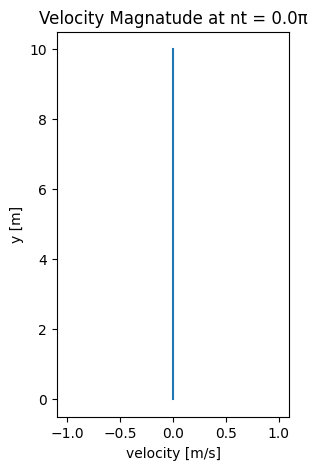

TypeError: CTCS() missing 1 required positional argument: 'time'

In [31]:
import numpy as np
import matplotlib.pyplot as plt

''' Parameters '''
pi = np.pi            # pi
nu = 1                # Dynamic Viscosity
n = 2                 # Constant
U0 = 1                # Initial Velocity
L = 10                # Height
T = 10*pi             # Transient Period (Quasi-Steady State)
dy = 0.4              # Grid Size
dt = pi/40            # Time Step
time = 0              # Initial Time

''' Set Grid & Initial Condition '''
y = np.arange(0, L+dy, dy)
u_CN = np.zeros(np.size(y))
Ny = np.size(u_CN)

''' Set Boundary Condition (Non-Slip) '''
def setBc(u, time):
    u[0] = U0*np.cos(n*time)
    u[-1] = 0.0
    
''' Calculate CFL number '''
def cal_CFL(u):
    return np.max(np.abs(u))*dt/dy
    
''' 2nd-order Central at Space & Crank-Nicolson at Time '''
def CTCS(u, dt, time):
    r = nu*dt/(2*dy**2)
    A = np.diag([1+2*r]*Ny) + np.diag([-r]*(Ny-1), 1) + np.diag([-r]*(Ny-1), -1)
    A[0,:] = 0
    A[0,0]= 1

    b = np.zeros_like(u)
    for i in range(1, Ny-1):
        b[i] = r*u[i-1] + (1-2*r)*u[i] + r*u[i+1]
    b[0] = U0*np.cos(n*time)

    new_u = np.linalg.solve(A, b)

    return new_u

''' Plot '''
def plot():
    plt.figure(figsize=(3,5))
    plt.title(f'Velocity Magnatude at nt = {n*time/pi:.1f}π')
    plt.plot(u_CN, y)
    plt.xlim([-1.1, 1.1])
    plt.xlabel('velocity [m/s]')
    plt.ylabel('y [m]')
    plt.show()

''' Operation '''
while time <= 2*pi:
    if n*time in [0, pi/2, pi, 3*pi/2, 2*pi]:
        plot()
    u_CN = CTCS(u_CN, time)
    setBc(u_CN, time)
    print(cal_CFL(u_CN))
    if cal_CFL(u_CN) > 1:
        break
    time += dt
print(u_CN)
print("=============== Finish Solver ===============")

## Convergence

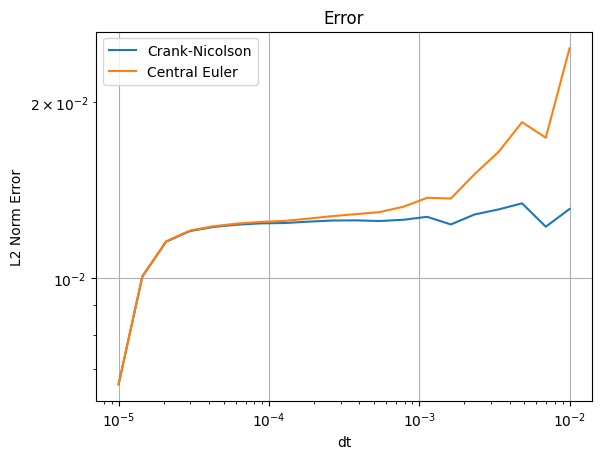

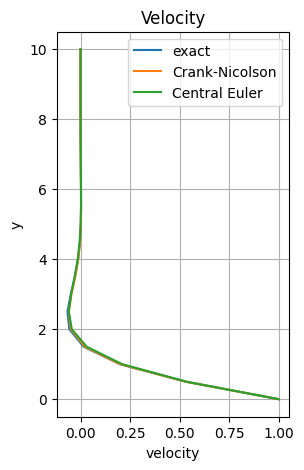

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

''' Parameters '''
pi = np.pi
nu = 1            # Dynamic Viscosity
n = 2             # Constant
U0 = 1            # Initial Velocity
L = 10            # Height
dy = 0.5          # Grid Size
dt_list = np.logspace(-5, -2, 20)     # Time Step
time = 0          # Initial Time

''' Set Grid & Initial Condition '''
y = np.arange(0, L+dy, dy)
u_F = np.zeros(np.size(y))
u_CN = np.zeros(np.size(y))
Ny = np.size(y)

def exact(y,time):
    eta = np.sqrt(n/(2*nu))*y
    u_exact = U0*np.exp(-eta)*np.cos(n*time-eta)
    return u_exact

u_exact = exact(y, pi)

''' Stability Check '''
def checkCFL(dt,dy,u):
    umax = np.max(u)
    CFL = umax*dt/dy
    return CFL

''' Set Boundary Condition '''
def setBc(u, time):  # Non-Slip
    u[0] = U0*np.cos(n*time)
    u[-1] = 0.0

''' 2nd-order Central at Space & Forward Euler at Time '''
def FTCS(u, dt):
    for i in range(1, Ny-1):
        u[i] += (nu * (u[i+1] - 2*u[i] + u[i-1]) / dy**2)*dt

    return u

''' 2nd-order Central at Space & Crank-Nicolson at Time '''
def CTCS(u, dt, time):
    r = nu*dt/(2*dy**2)
    A = np.diag([1+2*r]*Ny) + np.diag([-r]*(Ny-1), 1) + np.diag([-r]*(Ny-1), -1)
    A[0,:] = 0
    A[0,0]= 1

    b = np.zeros_like(u)
    for i in range(1, Ny-1):
        b[i] = r*u[i-1] + (1-2*r)*u[i] + r*u[i+1]
    b[0] = U0*np.cos(n*time)

    new_u = np.linalg.solve(A, b)

    return new_u

e_F = []
e_CN = []

def plot(e_F, e_CN):
    plt.title('Error')
    plt.plot(dt_list, e_CN, label='Crank-Nicolson')
    plt.plot(dt_list, e_F, label='Central Euler')
    plt.loglog()
    plt.xlabel('dt')
    plt.ylabel('L2 Norm Error')
    plt.legend()
    plt.grid('True')
    plt.show()

def plot2(u_F, u_CN):
    plt.figure(figsize=(3,5))
    plt.title('Velocity')
    plt.plot(u_exact, y, label='exact')
    plt.plot(u_CN, y, label='Crank-Nicolson')
    plt.plot(u_F, y, label='Central Euler')
    plt.xlabel('velocity')
    plt.ylabel('y')
    plt.legend()
    plt.grid('True')
    plt.show()

''' Operation '''
for dt in dt_list:
    while time <= pi:
        u_F = FTCS(u_F, dt)
        u_CN = CTCS(u_CN, dt, time)
        setBc(u_F, time)
        setBc(u_CN, time)
        time += dt
    u_exact = exact(y, pi)
    e_F.append(norm(u_exact - u_F, 2))
    e_CN.append(norm(u_exact - u_CN, 2))
    time = 0

plot(e_F, e_CN)
plot2(u_F, u_CN)

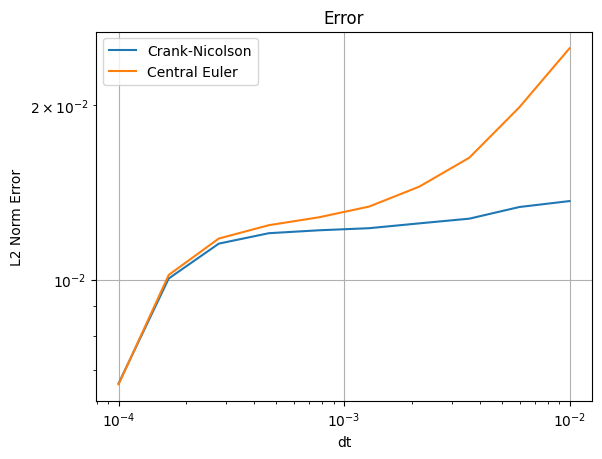

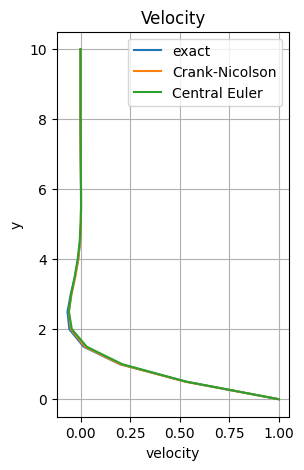

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

''' Parameters '''
pi = np.pi
nu = 1            # Dynamic Viscosity
n = 2             # Constant
U0 = 1            # Initial Velocity
L = 10            # Height
dy = 0.5          # Grid Size
dt_list = np.logspace(-4, -2, 10)     # Time Step
time = 0          # Initial Time

''' Set Grid & Initial Condition '''
y = np.arange(0, L+dy, dy)
u_F = np.zeros(np.size(y))
u_CN = np.zeros(np.size(y))
Ny = np.size(y)

def exact(y,time):
    eta = np.sqrt(n/(2*nu))*y
    u_exact = U0*np.exp(-eta)*np.cos(n*time-eta)
    return u_exact

u_exact = exact(y, pi)

''' Stability Check '''
def checkCFL(dt,dy,u):
    umax = np.max(u)
    CFL = umax*dt/dy
    return CFL

''' Set Boundary Condition '''
def setBc(u, time):  # Non-Slip
    u[0] = U0*np.cos(n*time)
    u[-1] = 0.0

''' 2nd-order Central at Space & Forward Euler at Time '''
def FTCS(u, dt):
    for i in range(1, Ny-1):
        u[i] += (nu * (u[i+1] - 2*u[i] + u[i-1]) / dy**2)*dt

    return u

''' 2nd-order Central at Space & Crank-Nicolson at Time '''
def CTCS(u, dt, time):
    r = nu*dt/(2*dy**2)
    A = np.diag([1+2*r]*Ny) + np.diag([-r]*(Ny-1), 1) + np.diag([-r]*(Ny-1), -1)
    A[0,:] = 0
    A[0,0]= 1

    b = np.zeros_like(u)
    for i in range(1, Ny-1):
        b[i] = r*u[i-1] + (1-2*r)*u[i] + r*u[i+1]
    b[0] = U0*np.cos(n*time)

    new_u = np.linalg.solve(A, b)

    return new_u

e_F = []
e_CN = []

def plot(e_F, e_CN):
    plt.title('Error')
    plt.plot(dt_list, e_CN, label='Crank-Nicolson')
    plt.plot(dt_list, e_F, label='Central Euler')
    plt.loglog()
    plt.xlabel('dt')
    plt.ylabel('L2 Norm Error')
    plt.legend()
    plt.grid('True')
    plt.show()

def plot2(u_F, u_CN):
    plt.figure(figsize=(3,5))
    plt.title('Velocity')
    plt.plot(u_exact, y, label='exact')
    plt.plot(u_CN, y, label='Crank-Nicolson')
    plt.plot(u_F, y, label='Central Euler')
    plt.xlabel('velocity')
    plt.ylabel('y')
    plt.legend()
    plt.grid('True')
    plt.show()

''' Operation '''
for dt in dt_list:
    while time <= pi:
        u_F = FTCS(u_F, dt)
        u_CN = CTCS(u_CN, dt, time)
        setBc(u_F, time)
        setBc(u_CN, time)
        time += dt
    u_exact = exact(y, pi)
    e_F.append(norm(u_exact - u_F, 2))
    e_CN.append(norm(u_exact - u_CN, 2))
    time = 0

plot(e_F, e_CN)
plot2(u_F, u_CN)

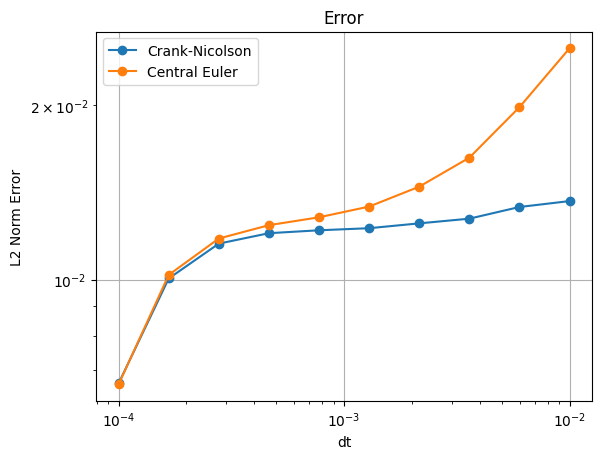

In [2]:
    plt.title('Error')
    plt.plot(dt_list, e_CN,'o-', label='Crank-Nicolson')
    plt.plot(dt_list, e_F, 'o-', label='Central Euler')
    plt.loglog()
    plt.xlabel('dt')
    plt.ylabel('L2 Norm Error')
    plt.legend()
    plt.grid('True')
    plt.show()

## C-N Scheme at L=2

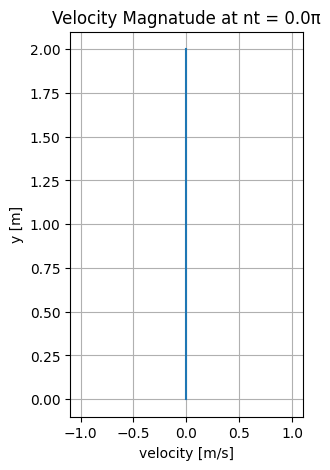

0.39269908169872414
0.38786430435624725
0.37347902059269444
0.3498974438363441
0.3177002307697037
0.2776801836348979
0.23082272881130705
0.19189033986424356
0.159670539041807
0.13305739176885353


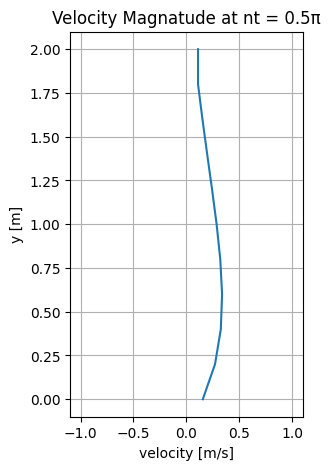

0.11086628871187347
0.0919223306132964
0.12135068992034162
0.17828165234766485
0.23082272881130703
0.2776801836348978
0.31770023076970366
0.349897443836344
0.37347902059269444
0.3878643043562472


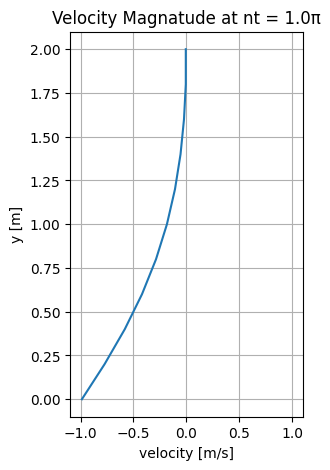

0.39269908169872414
0.38786430435624725
0.3734790205926945
0.3498974438363441
0.3177002307697037
0.27768018363489794
0.23917583197985282
0.2057682302880517
0.176640502271398
0.1533327390164036


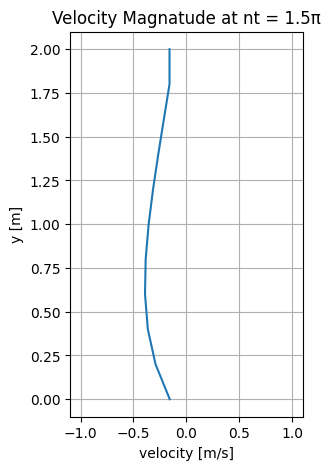

0.1322009257897678
0.11245922468483378
0.12135068992034158
0.17828165234766483
0.230822728811307
0.2776801836348978
0.31770023076970366
0.349897443836344
0.37347902059269444
0.3878643043562472


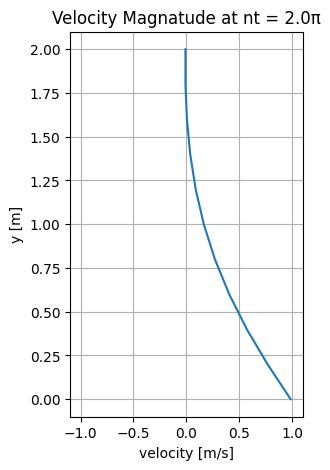

0.39269908169872414
=============== Finish Solver ===============


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import cg

''' Parameters '''
pi = np.pi            # pi
nu = 1                # Dynamic Viscosity
n = 2                 # Constant
U0 = 1                # Initial Velocity
L = 2                 # Height
T = 10*pi             # Transient Period (Quasi-Steady State)
dy = 0.2              # Grid Size
dt = pi/40            # Time Step
time = 0              # Initial Time

''' Set Grid & Initial Condition '''
y = np.arange(0, L+dy, dy)
u = np.zeros(np.size(y))
Ny = np.size(u)

''' Set Boundary Condition (Non-Slip) '''
def setBc(u, time):
    u[0] = U0*np.cos(n*time)
    u[-1] = u[-2]

''' Calculate CFL number '''
def cal_CFL(u):
    return np.max(np.abs(u))*dt/dy

''' 2nd-order Central at Space & Crank-Nicolson at Time '''
def CTCS(u, time):
    r = nu*dt/(2*dy**2)
    A = diags([[-r], [2*r+1], [-r]], [-1, 0, 1], shape=(Ny, Ny)).toarray()
    A[0,:] = 0
    A[0,0] = 1

    b = np.zeros_like(u)
    for i in range(1, Ny-1):
        b[i] = r*u[i-1] + (1-2*r)*u[i] + r*u[i+1]
    b[0] = U0*np.cos(n*time)

    new_u, info = cg(A, b, tol=1e-10, maxiter=1000)

    return new_u

''' Plot '''
def plot():
    plt.figure(figsize=(3,5))
    plt.title(f'Velocity Magnatude at nt = {n*time/pi:.1f}π')
    plt.plot(u, y)
    plt.xlim([-1.1, 1.1])
    plt.xlabel('velocity [m/s]')
    plt.ylabel('y [m]')
    plt.grid('True')
    plt.show()

''' Operation '''
while time <= np.pi:
    if n*time in [0, pi/2, pi, 3*pi/2, 2*pi]:
        plot()
    u = CTCS(u, time)
    setBc(u, time)
    print(cal_CFL(u))
    if cal_CFL(u) > 0.5:
        break
    time += dt

print("=============== Finish Solver ===============")